In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
from time import time

from keras.wrappers.scikit_learn import KerasClassifier

from keras.datasets import mnist
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [3]:
df=pd.DataFrame(pd.read_csv('mnist_train1.csv'))
df2=pd.DataFrame(pd.read_csv('mnist_test1.csv'))

x_train1 = df.drop('label',axis=1)
y_train = df['label']
x_test1  = df2.drop('label',axis=1)
y_test  = df2['label']

y_train1 = to_categorical(y_train)
y_test1  = to_categorical(y_test)

In [4]:
t0=time()
scaler=MinMaxScaler()
scaler.fit(x_train1)
x_train=scaler.transform(x_train1)
x_test=scaler.transform(x_test1)
print("Standardization done in %0.3fs" % (time() - t0))

Standardization done in 5.113s


In [5]:
t0 = time()
pca=PCA(n_components= 10 * 10)
pca.fit(x_train)
x_train=pca.transform(x_train)
x_test=pca.transform(x_test)
print("PCA transformation done in %0.3fs" % (time() - t0))

PCA transformation done in 28.520s


In [6]:
def define_model():
    model = Sequential()
    model.add(Dense(200, activation='relu', kernel_initializer='lecun_normal', input_dim =x_train.shape[1]))
    model.add(Dense(200, activation='relu', kernel_initializer='lecun_normal'))
    model.add(Dense(10, activation='softmax'))
    #model.add(Dense(1, activation='relu'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def define_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(10, 10, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [8]:
t0=time()
model_mlp = define_model()
history_mlp = model_mlp.fit(x_train, y_train1, validation_data = ( x_test,y_test1 ), batch_size=32, epochs = 20)
print("MLP training done in %0.3fs" % (time() - t0))

Epoch 1/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2360 - accuracy: 0.9301 - val_loss: 0.1087 - val_accuracy: 0.9651
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0939 - accuracy: 0.9716 - val_loss: 0.0908 - val_accuracy: 0.9724
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0652 - accuracy: 0.9796 - val_loss: 0.0757 - val_accuracy: 0.9762
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0497 - accuracy: 0.9848 - val_loss: 0.0671 - val_accuracy: 0.9791
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0693 - val_accuracy: 0.9793
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0682 - val_accuracy: 0.9800
Epoch 7/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0220 - accuracy: 0.9935 - val_loss: 0.0706 -

In [10]:
predictions_test = model_mlp.predict(x_test)
predictions_train= model_mlp.predict(x_train)
predictions_test = [np.argmax(element) for element in predictions_test]
predictions_train= [np.argmax(element) for element in predictions_train]
print("The accuracy in training set is {}".format(accuracy_score(predictions_train,y_train)))#format(model.score(x_train,y_train)))
print("The accuracy in testing set is {}".format(accuracy_score(predictions_test,y_test)))#format(model.score(x_test,y_test)))
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

The accuracy in training set is 1.0
The accuracy in testing set is 0.9813
[[ 971    0    1    0    1    1    1    1    3    1]
 [   0 1127    2    1    0    1    2    1    1    0]
 [   3    1 1008    3    1    0    1    9    6    0]
 [   2    0    5  994    0    3    0    2    3    1]
 [   1    0    4    0  963    0    3    1    1    9]
 [   2    0    0   10    0  865    3    2    6    4]
 [   2    3    0    1    4    2  944    0    2    0]
 [   1    1    7    2    1    0    0 1007    3    6]
 [   2    0    1    7    2    1    2    3  954    2]
 [   2    2    0    6    7    3    2    3    4  980]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6  

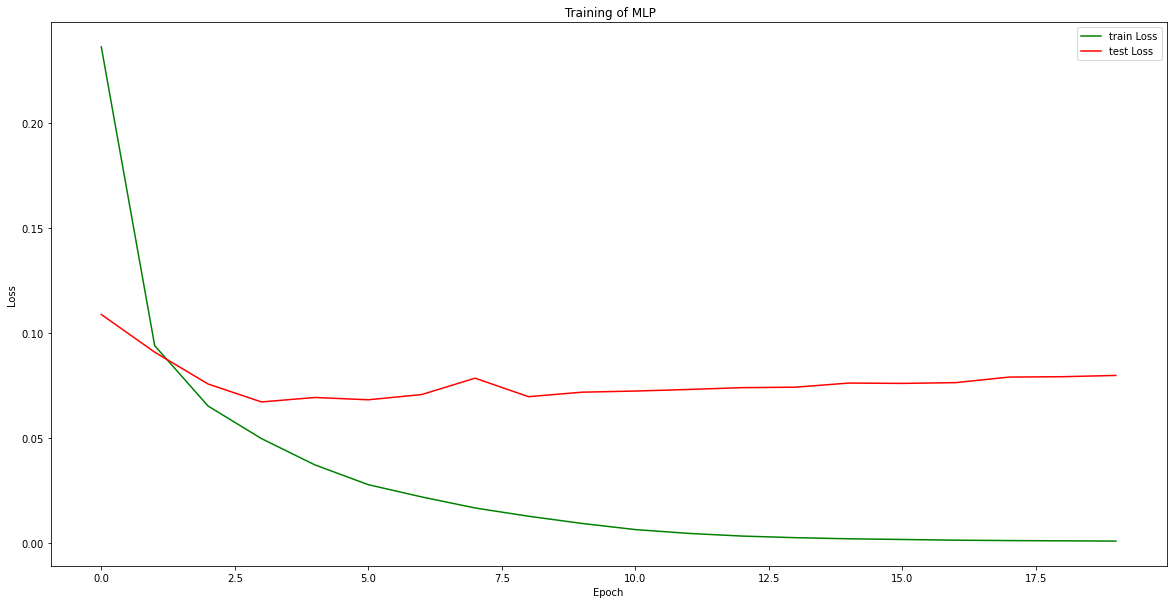

In [14]:
plt.figure(figsize=(20,10))
plt.plot( history_mlp.history['loss'] , color = 'green', label = 'train Loss')
plt.plot( history_mlp.history['val_loss'] , color = 'red', label = 'test Loss')
plt.title(' Training of MLP')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
x_train_cnn = x_train.reshape((x_train.shape[0], 10, 10, 1))
x_test_cnn  = x_test.reshape((x_test.shape[0], 10, 10, 1))

In [12]:
t0=time()
model_cnn = define_cnn_model()
history_cnn = model_cnn.fit(x_train_cnn, y_train1, validation_data = ( x_test_cnn,y_test1 ), batch_size=32, epochs = 20)
print("CNN training done in %0.3fs" % (time() - t0))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3923 - accuracy: 0.8768 - val_loss: 0.2493 - val_accuracy: 0.9192
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1978 - accuracy: 0.9378 - val_loss: 0.1809 - val_accuracy: 0.9426
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1504 - accuracy: 0.9526 - val_loss: 0.1614 - val_accuracy: 0.9477
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1253 - accuracy: 0.9608 - val_loss: 0.1407 - val_accuracy: 0.9571
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1065 - accuracy: 0.9660 - val_loss: 0.1440 - val_accuracy: 0.9562
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0904 - accuracy: 0.9711 - val_loss: 0.1370 - val_accuracy: 0.9592
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0818 - accuracy: 0.9734 - val_loss: 0.1425 - val_accuracy:

In [13]:
predictions_test = model_cnn.predict(x_test_cnn)
predictions_train= model_cnn.predict(x_train_cnn)
predictions_test = [np.argmax(element) for element in predictions_test]
predictions_train= [np.argmax(element) for element in predictions_train]
print("The accuracy in training set is {}".format(accuracy_score(predictions_train,y_train)))#format(model.score(x_train,y_train)))
print("The accuracy in testing set is {}".format(accuracy_score(predictions_test,y_test)))#format(model.score(x_test,y_test)))
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

The accuracy in training set is 0.99485
The accuracy in testing set is 0.9646
[[ 962    0    4    0    0    1    8    2    3    0]
 [   1 1129    2    2    1    0    0    0    0    0]
 [   3    4  997   10    3    3    2    4    5    1]
 [   2    1    8  978    0    8    2    4    4    3]
 [   1    0    3    1  939    2    8    7    1   20]
 [   1    2    2   21    1  847    8    1    6    3]
 [   7    4    3    2    1    7  931    1    2    0]
 [   2    7   14    6    2    1    0  988    4    4]
 [   7    4   10   15    4    7    0    1  923    3]
 [   4    7    0   16   11    5    2   11    1  952]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.93      0.97      0.95      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.95      0.96       892
          

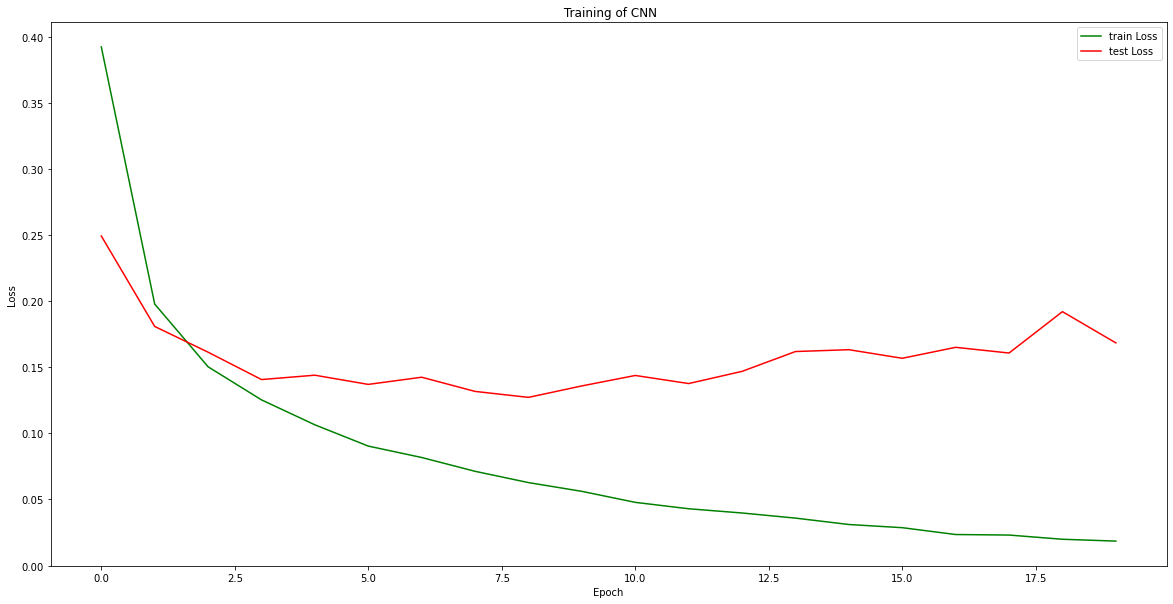

In [15]:
plt.figure(figsize=(20,10))
plt.plot( history_cnn.history['loss'] , color = 'green', label = 'train Loss')
plt.plot( history_cnn.history['val_loss'] , color = 'red', label = 'test Loss')
plt.title(' Training of CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()